<a href="https://colab.research.google.com/github/DaffaHamsy/Mini-Project-SLO/blob/main/Mini_Project_SLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Analyzing file: CPA1.xlsx
Unique Labels in /content/drive/My Drive/Mini Project/CPA1.xlsx : ['A' 'E']
SVM Classifier Performance:
Accuracy: 0.46
Precision: 0.7515999999999999
Recall: 0.46
F1-Score: 0.28986301369863016

K-NN Classifier Performance:
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-Score: 0.76


Analyzing file: CPA2.xlsx
Unique Labels in /content/drive/My Drive/Mini Project/CPA2.xlsx : ['B' 'E']
SVM Classifier Performance:
Accuracy: 0.46
Precision: 0.7515999999999999
Recall: 0.46
F1-Score: 0.28986301369863016

K-NN Classifier Performance:
Accuracy: 0.82
Precision: 0.8210897435897436
Recall: 0.82
F1-Score: 0.8202167804094742


Analyzing file: CPA3.xlsx
Unique Labels in /content/drive/My Drive/Mini Project/CPA3.xlsx : ['A' 'E']
SVM Classifier Performance:
Accuracy: 0.6666666666666666
Precision: 0.7777777777777777
Recall: 0.6666666666666666
F1-Score:

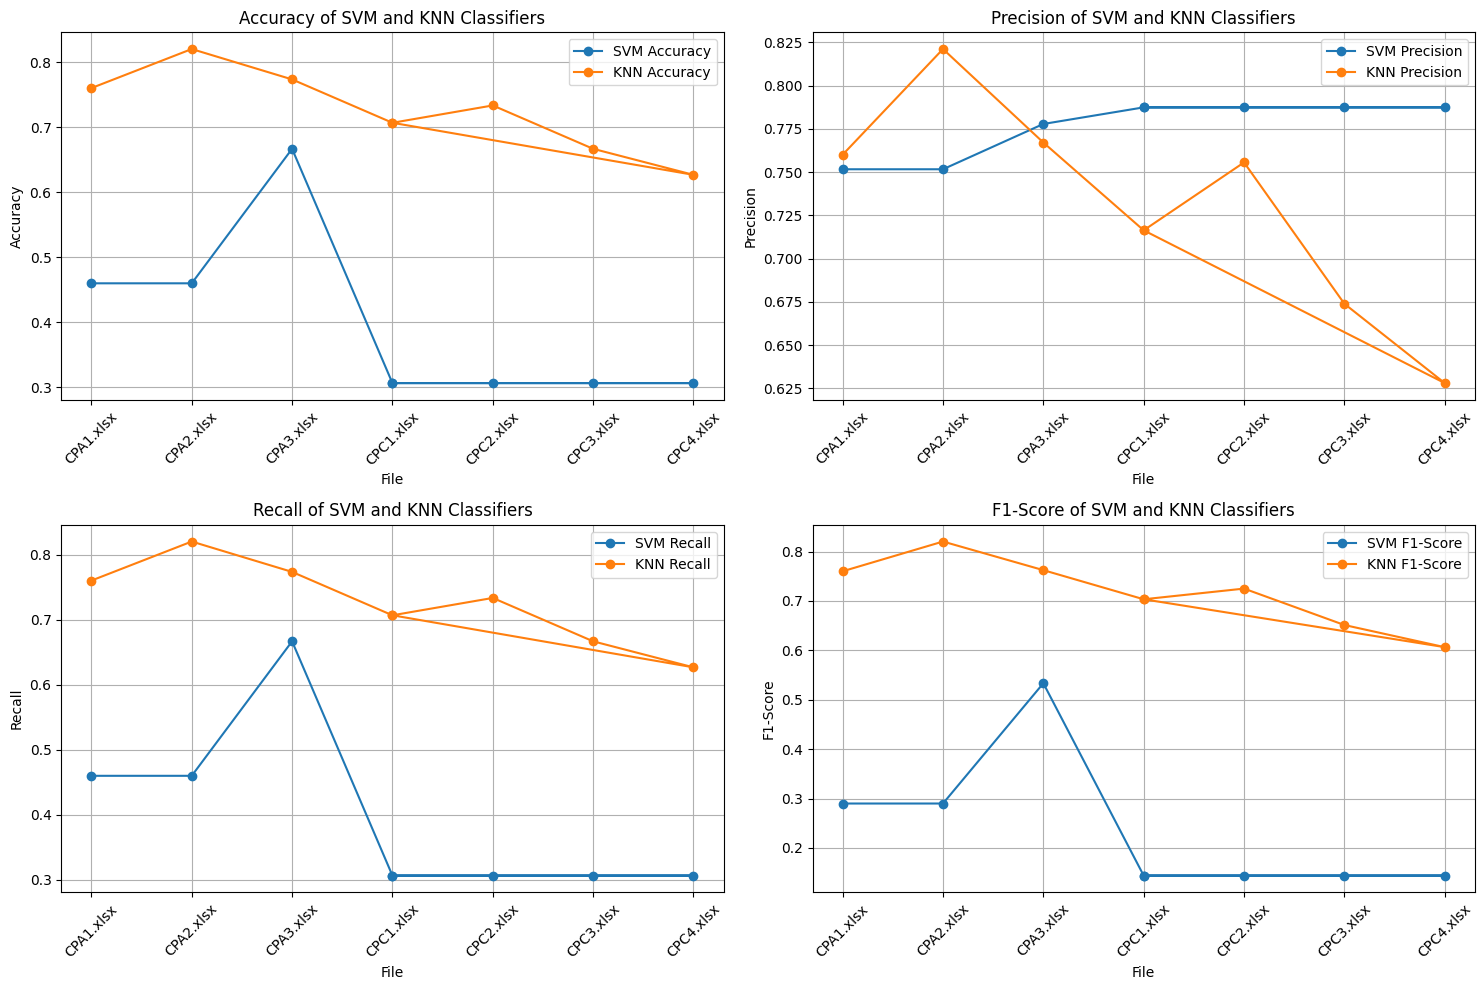

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Lokasi file Excel di Google Drive
file_names = ['CPA1.xlsx', 'CPA2.xlsx', 'CPA3.xlsx', 'CPC1.xlsx', 'CPC2.xlsx', 'CPC3.xlsx', 'CPC4.xlsx', 'CPC1.xlsx']
folder_path = '/content/drive/My Drive/Mini Project/'

# Kolom yang akan digunakan untuk klasifikasi
columns = ['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']

# Fungsi untuk memuat data dari file Excel
def load_data(file_path):
    data = pd.read_excel(file_path)
    X = data[columns[:-1]]  # Fitur
    y = data['kelas']  # Target
    return X, y

# Fungsi untuk melakukan pembagian data menjadi training set dan test set
def train_test_splitting(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# Fungsi untuk melakukan 10-fold cross validation
def k_fold_cv(X, y, classifier, k=10):
    kf = KFold(n_splits=k)
    accuracy_scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
    return accuracy_scores

# Fungsi untuk menghitung parameter performansi
def calculate_performance_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Fungsi untuk memeriksa label yang ada dalam kolom target
def verify_labels(file_path):
    data = pd.read_excel(file_path)
    unique_labels = data['kelas'].unique()
    print("Unique Labels in", file_path, ":", unique_labels)

# List untuk menyimpan hasil klasifikasi
results = []

# Loop untuk membaca dan menganalisis setiap file Excel
for file_name in file_names:
    file_path = folder_path + file_name
    print("Analyzing file:", file_name)

    try:
        # Memeriksa label dalam kolom target
        verify_labels(file_path)

        # Memuat data
        X, y = load_data(file_path)

        # 75% training, 25% testing
        X_train, X_test, y_train, y_test = train_test_splitting(X, y, test_size=0.25)

        # Inisialisasi SVM classifier
        svm_classifier = SVC()

        # Latih SVM classifier
        svm_classifier.fit(X_train, y_train)

        # Inisialisasi K-NN classifier
        knn_classifier = KNeighborsClassifier()

        # Latih K-NN classifier
        knn_classifier.fit(X_train, y_train)

        # Prediksi
        svm_predictions = svm_classifier.predict(X_test)
        knn_predictions = knn_classifier.predict(X_test)

        # Menghitung parameter performansi
        svm_accuracy, svm_precision, svm_recall, svm_f1 = calculate_performance_metrics(y_test, svm_predictions)
        knn_accuracy, knn_precision, knn_recall, knn_f1 = calculate_performance_metrics(y_test, knn_predictions)

        # Menyimpan hasil klasifikasi
        results.append({
            'File': file_name,
            'SVM Accuracy': svm_accuracy,
            'SVM Precision': svm_precision,
            'SVM Recall': svm_recall,
            'SVM F1-Score': svm_f1,
            'KNN Accuracy': knn_accuracy,
            'KNN Precision': knn_precision,
            'KNN Recall': knn_recall,
            'KNN F1-Score': knn_f1
        })

        # Menampilkan hasil
        print("SVM Classifier Performance:")
        print("Accuracy:", svm_accuracy)
        print("Precision:", svm_precision)
        print("Recall:", svm_recall)
        print("F1-Score:", svm_f1)
        print()

        print("K-NN Classifier Performance:")
        print("Accuracy:", knn_accuracy)
        print("Precision:", knn_precision)
        print("Recall:", knn_recall)
        print("F1-Score:", knn_f1)
        print()

    except FileNotFoundError:
        print("File not found:", file_name)
    print()

# Membuat DataFrame dari hasil klasifikasi
results_df = pd.DataFrame(results)

# Menampilkan tabel hasil klasifikasi
print(results_df)

# Plot performansi SVM dan KNN
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(results_df['File'], results_df['SVM Accuracy'], label='SVM Accuracy', marker='o')
plt.plot(results_df['File'], results_df['KNN Accuracy'], label='KNN Accuracy', marker='o')
plt.title('Accuracy of SVM and KNN Classifiers')
plt.xlabel('File')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(results_df['File'], results_df['SVM Precision'], label='SVM Precision', marker='o')
plt.plot(results_df['File'], results_df['KNN Precision'], label='KNN Precision', marker='o')
plt.title('Precision of SVM and KNN Classifiers')
plt.xlabel('File')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(results_df['File'], results_df['SVM Recall'], label='SVM Recall', marker='o')
plt.plot(results_df['File'], results_df['KNN Recall'], label='KNN Recall', marker='o')
plt.title('Recall of SVM and KNN Classifiers')
plt.xlabel('File')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(results_df['File'], results_df['SVM F1-Score'], label='SVM F1-Score', marker='o')
plt.plot(results_df['File'], results_df['KNN F1-Score'], label='KNN F1-Score', marker='o')
plt.title('F1-Score of SVM and KNN Classifiers')
plt.xlabel('File')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
